### Linear regression with Tensorflow

#### Preparation of train set

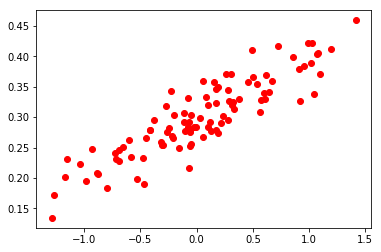

In [1]:
import numpy as np

num_points = 100

# x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 num_point 만큼 생성합니다. 
x_data = np.random.normal(0.0, 0.55, num_points)        

# y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다.
# 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.
y_data =x_data * 0.1 + 0.3 + np.random.normal(0.0, 0.03, num_points)

import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

#### Learning of train set

0 0.0158887 [-0.11008587] [ 0.30941677]
1 0.00698485 [-0.03654895] [ 0.30465159]
2 0.00334155 [ 0.01051463] [ 0.3020117]
3 0.00185071 [ 0.04062058] [ 0.30032218]
4 0.00124066 [ 0.05987898] [ 0.29924139]
5 0.000991024 [ 0.07219834] [ 0.29855004]
6 0.000888873 [ 0.08007888] [ 0.2981078]
7 0.000847074 [ 0.08511997] [ 0.29782489]


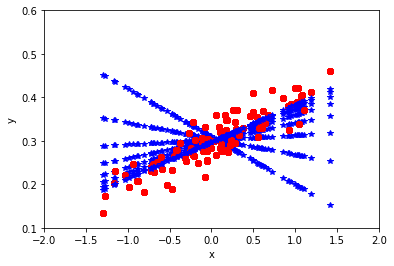

In [9]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt


# -1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 
# 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))


X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# hypothesis
y = W * X + b

# cost 함수: 평균 제곱근 오차(mean squared error)
cost = tf.reduce_mean(tf.square(y - Y))
# 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost)

# 모든 변수를 초기화하고 세션을 시작합니다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.
for step in range(8):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b*')
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show

#### prediction with hypothesis

In [8]:
print(sess.run(y, feed_dict={X:2.0}))

[ 0.53535569]
